# Softmax

In [ ]:
# Softmax Layer
# applies the exponential function to each element & normalizes them by the sum of all exponentials
# output between 0 and 1
# converts logits to probabilities

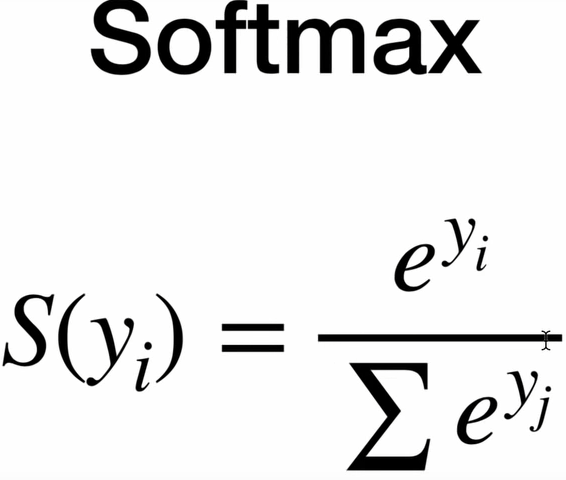

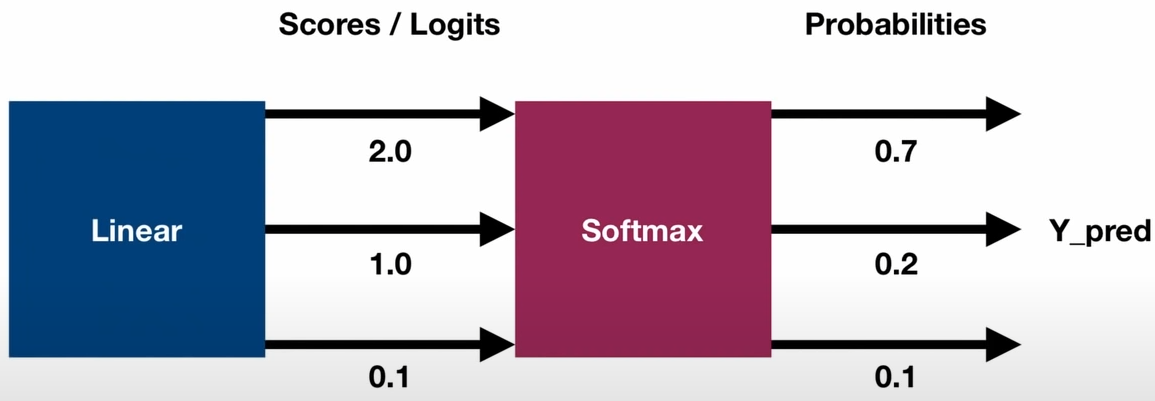

In [4]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

In [3]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy: ', outputs)
# highest logit has the highest probability

softmax numpy:  [0.65900114 0.24243297 0.09856589]


In [5]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax tensor: ', outputs)

softmax tensor:  tensor([0.6590, 0.2424, 0.0986])


# Cross-Entropy

In [1]:
# Cross-Entropy loss
# many times it is combined with softmax function

# bad prediction means high cross-entropy loss

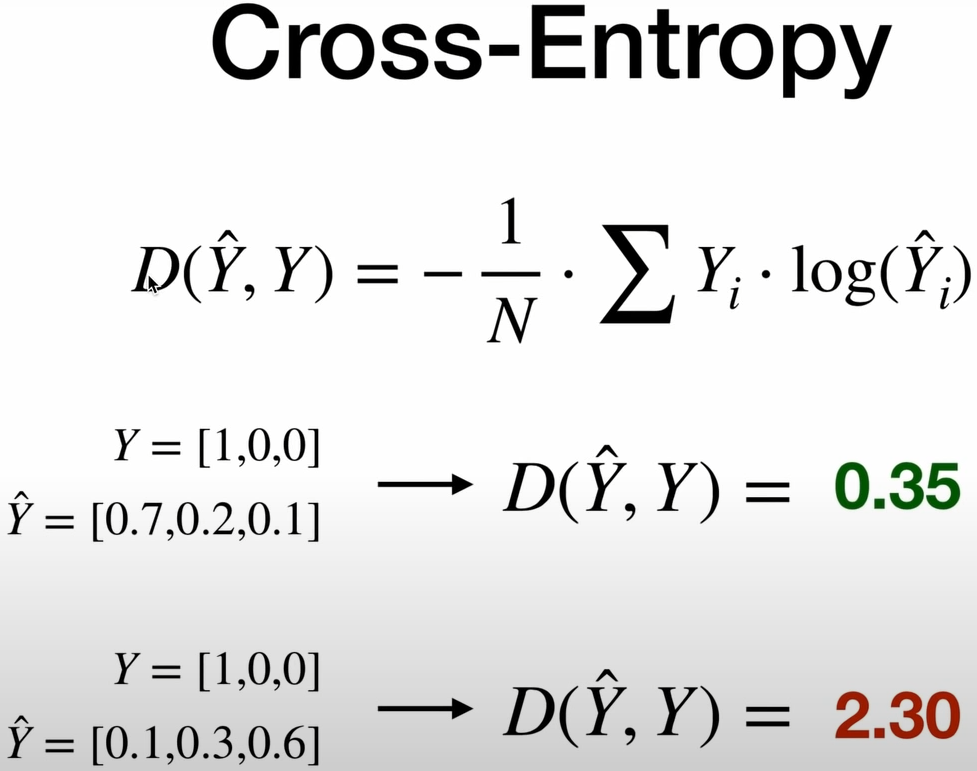

In [12]:
# without pytorch
def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted)) / len(actual)
    return loss

# y must be one hot encoded
Y = np.array([1,0,0])

# y_pred has probabilities
y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, y_pred_good)
l2 = cross_entropy(Y, y_pred_bad)

print('Loss1 numpy: ', round(l1,4))
print('Loss2 numpy: ', round(l2,4))

Loss1 numpy:  0.1189
Loss2 numpy:  0.7675


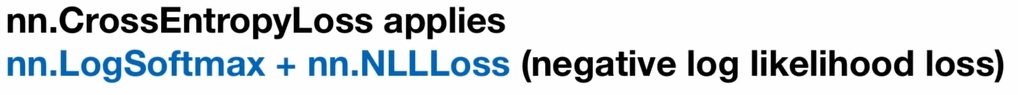

In [19]:
# with pytorch
# already implements softmax layer
# Y is not one-hot encoded
# Y_pred is logits and not softmax normalized values

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print('Loss1 tensor: ', round(l1.item(),4))
print('Loss2 tensor: ', round(l2.item(),4))

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print('predictions1: ', predictions1)
print('predictions2: ', predictions2)

Loss1 tensor:  0.3018
Loss2 tensor:  1.6242
predictions1:  tensor([2, 0, 1])
predictions2:  tensor([0, 2, 1])


# Classification

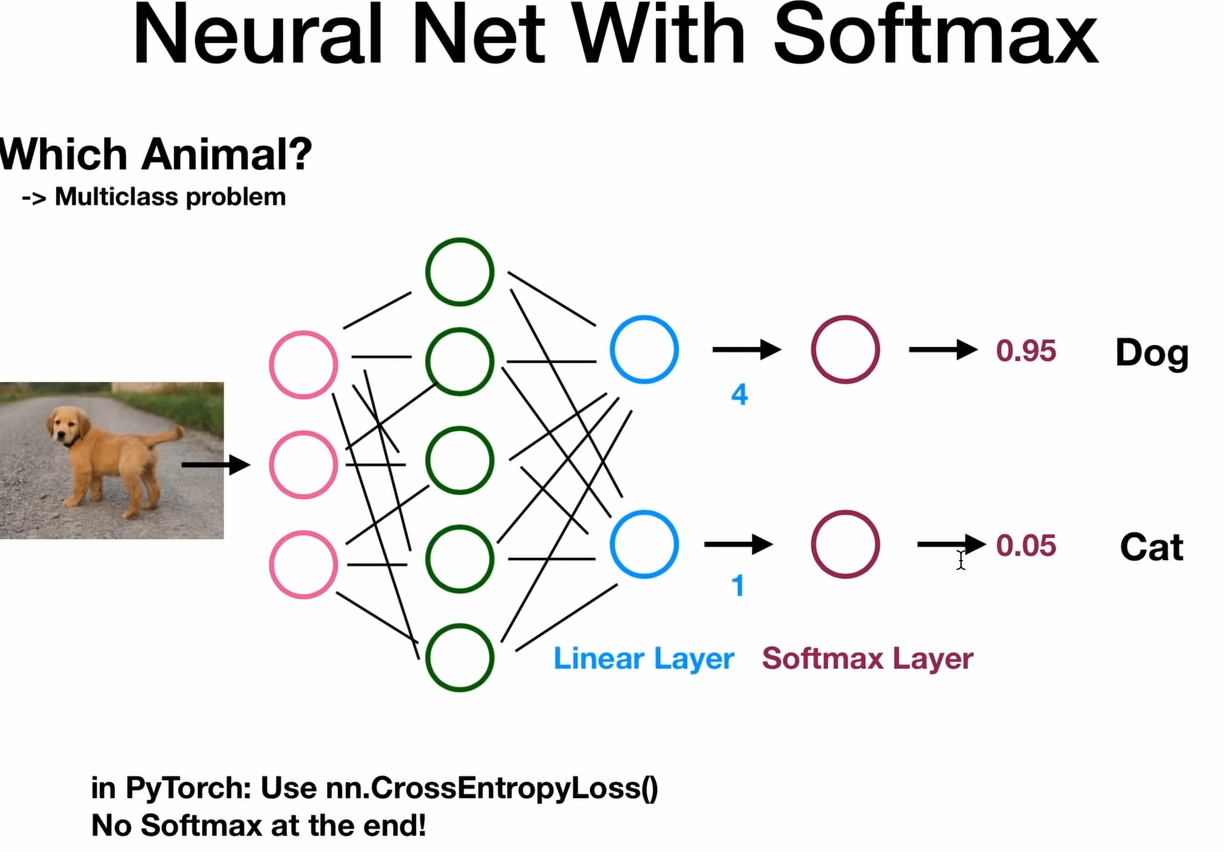

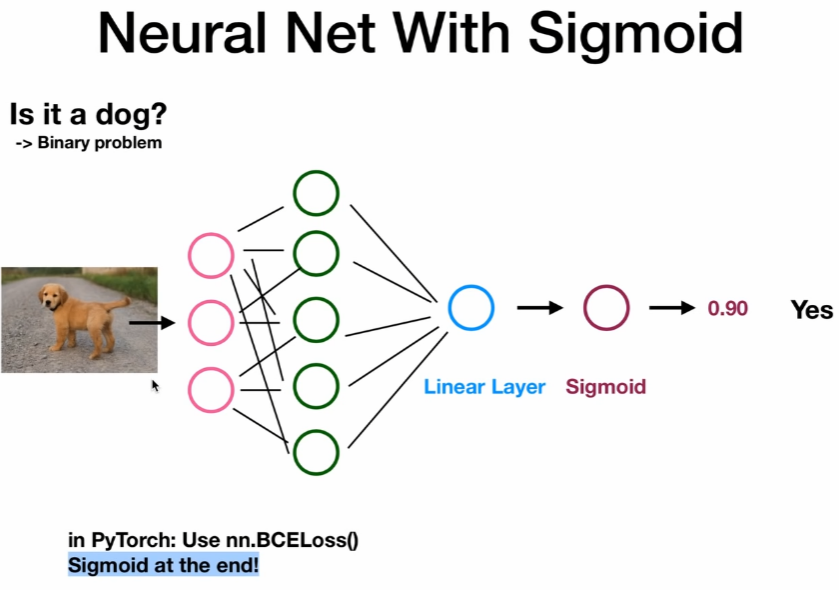

In [ ]:
# binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        # no softmax at the end
        return out
    
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

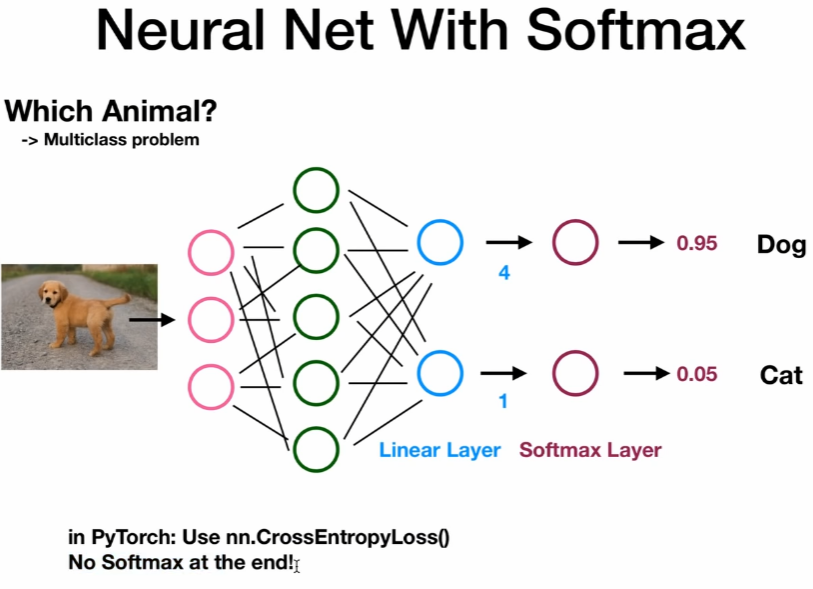

In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out
    
    
# Training
learning_rate = 0.01
n_iters = 50

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #(applies softmax)